In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = 'ratings_Beauty.csv'
data = pd.read_csv(file_path, delimiter=';')

In [3]:
# Display the first few rows of the dataset
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
# Check for missing values
missing_values = data.isnull().sum()

In [5]:
# Check for duplicates
duplicate_records = data.duplicated().sum()

In [6]:
# Display basic statistics of the dataset
data_description = data.describe()

missing_values, duplicate_records, data_description

(UserId       0
 ProductId    0
 Rating       0
 Timestamp    0
 dtype: int64,
 0,
              Rating     Timestamp
 count  1.048575e+06  1.048575e+06
 mean   4.176864e+00  1.345636e+09
 std    1.306543e+00  5.567113e+07
 min    1.000000e+00  9.087552e+08
 25%    4.000000e+00  1.322438e+09
 50%    5.000000e+00  1.362960e+09
 75%    5.000000e+00  1.385856e+09
 max    5.000000e+00  1.406074e+09)

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
# Check the column names in the dataset
print(data.columns)

Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')


In [9]:
# Display the first few rows of the dataset
print(data.head())

           UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200


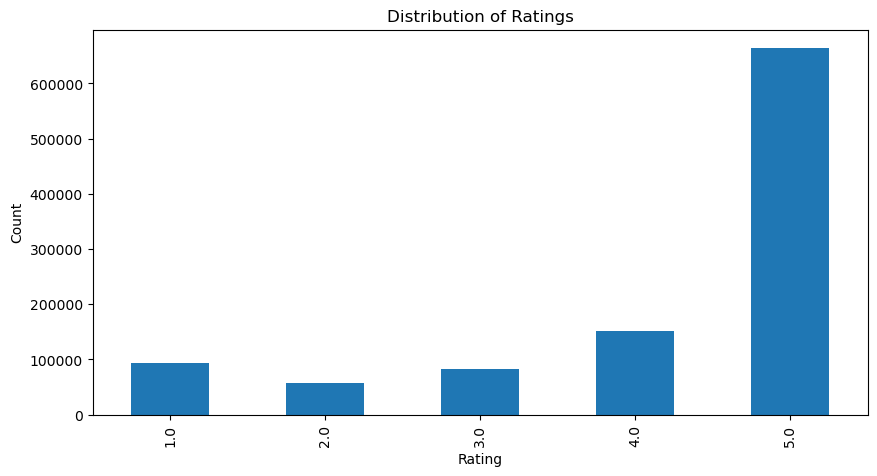

In [10]:
# 
plt.figure(figsize=(10, 5))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

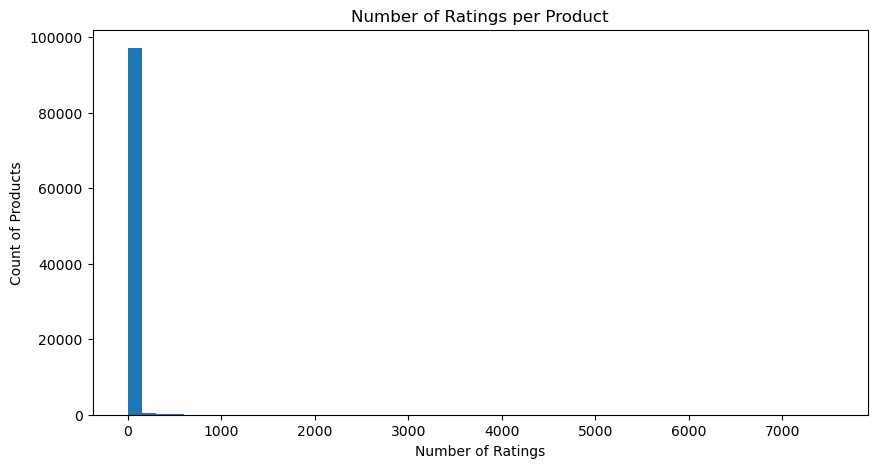

In [11]:
# Number of ratings per product
plt.figure(figsize=(10, 5))
data['ProductId'].value_counts().plot(kind='hist', bins=50)
plt.title('Number of Ratings per Product')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Products')
plt.show()

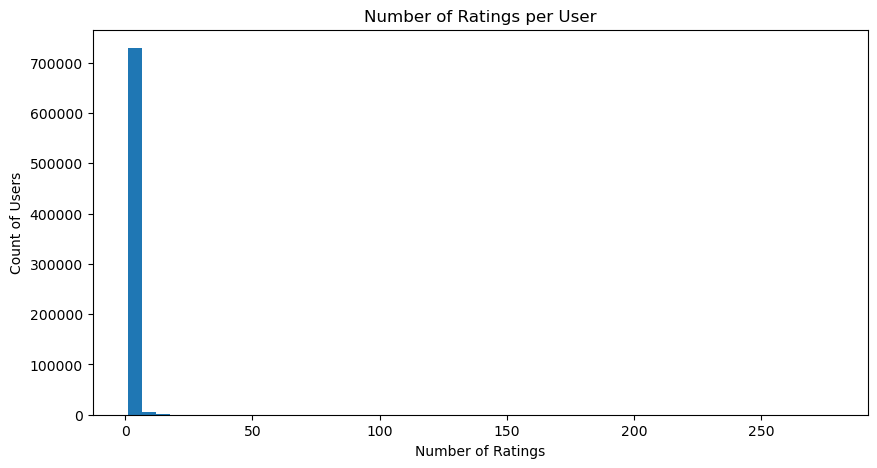

In [12]:
# Number of ratings per user
plt.figure(figsize=(10, 5))
data['UserId'].value_counts().plot(kind='hist', bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

In [13]:
#Time Series of Ratings
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
ratings_per_time = data.set_index('Timestamp').resample('M').size()

# Check if the conversion was successful
print(data['Timestamp'].head())

# Feature Engineering: Add additional time-based features
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day

# Preview the cleaned and preprocessed data
data.head()



C:\Users\siphe\AppData\Local\Temp\ipykernel_40564\2071000906.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ratings_per_time = data.set_index('Timestamp').resample('M').size()


0   2013-05-28
1   2012-12-14
2   2014-07-07
3   2013-10-24
4   2010-05-19
Name: Timestamp, dtype: datetime64[ns]


,UserId,ProductId,Rating,Timestamp,Year,Month,Day
0,A39HTATAQ9V7YF,0205616461,5.0,2013-05-28,2013,5,28
1,A3JM6GV9MNOF9X,0558925278,3.0,2012-12-14,2012,12,14
2,A1Z513UWSAAO0F,0558925278,5.0,2014-07-07,2014,7,7
3,A1WMRR494NWEWV,0733001998,4.0,2013-10-24,2013,10,24
4,A3IAAVS479H7M7,0737104473,1.0,2010-05-19,2010,5,19


In [14]:
# Analyze the correlation between rating and time-based features
time_based_analysis = data.groupby(['Year', 'Month'])['Rating'].mean().unstack()

<Figure size 1200x800 with 0 Axes>

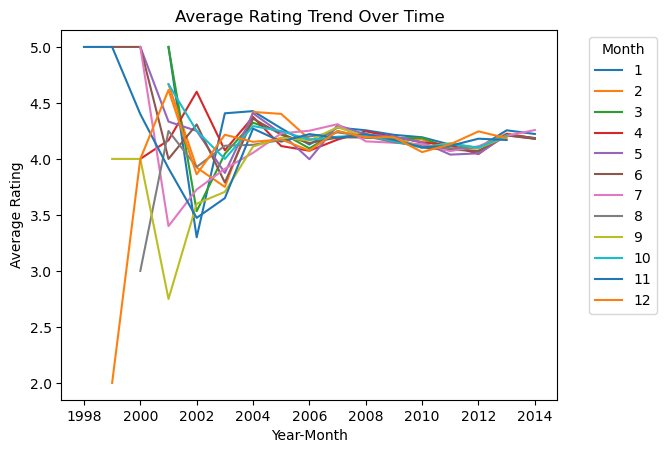

In [15]:
# Plotting the trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
time_based_analysis.plot(kind='line')
plt.title('Average Rating Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

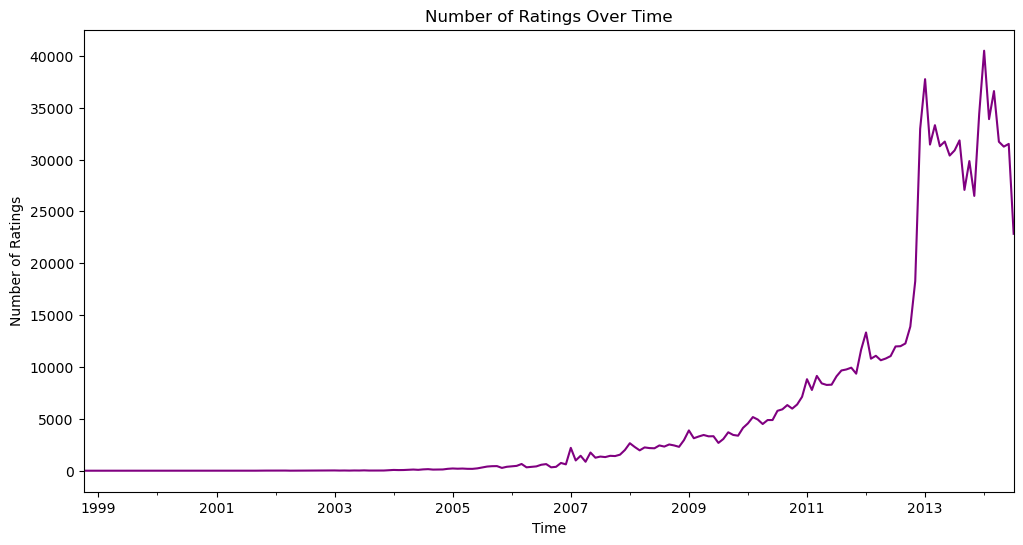

In [16]:

#Time Series of Ratings
plt.figure(figsize=(12, 6))
ratings_per_time.plot(color='purple')
plt.title('Number of Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()

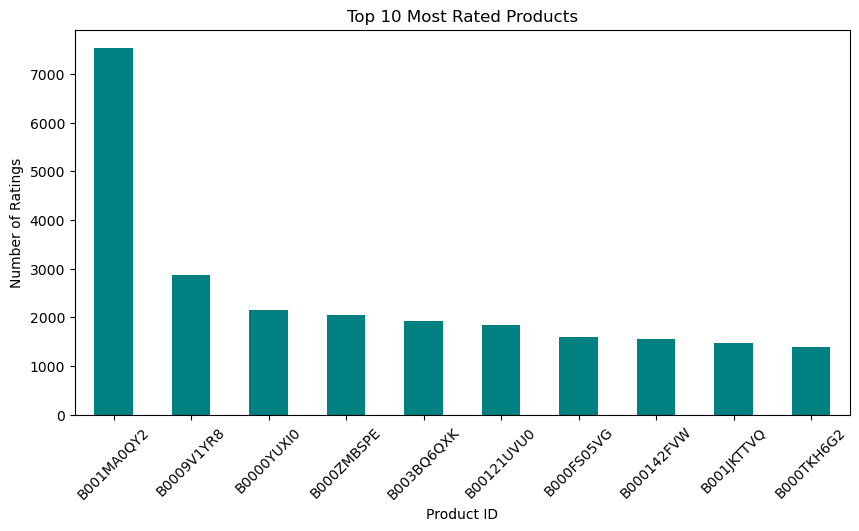

In [17]:
#Top 10 Most Rated Products
#This bar chart shows the top 10 most rated products, which can be useful for identifying the most popular items in the dataset.
top_10_products = data['ProductId'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_10_products.plot(kind='bar', color='teal')
plt.title('Top 10 Most Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

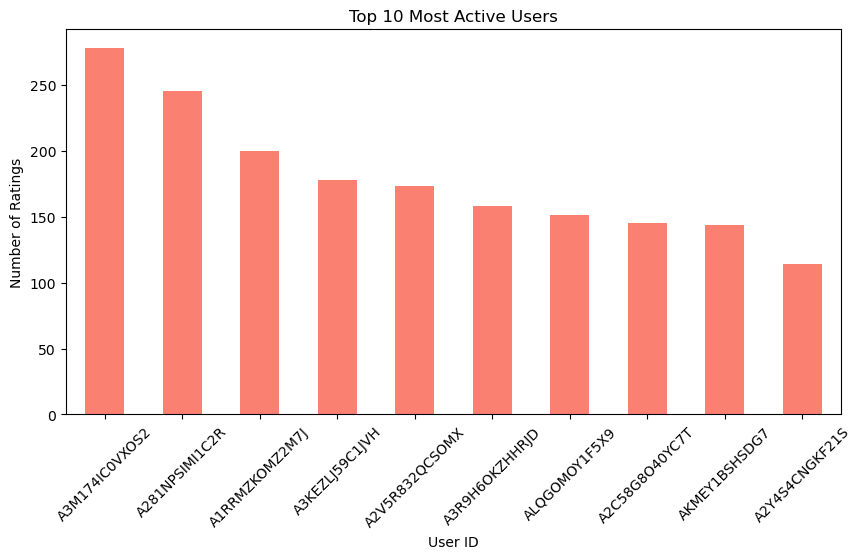

In [18]:
#Top 10 Most Active Users
#This bar chart shows the top 10 users who have given the most ratings.

top_10_users = data['UserId'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_10_users.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

In [19]:
import seaborn as sns

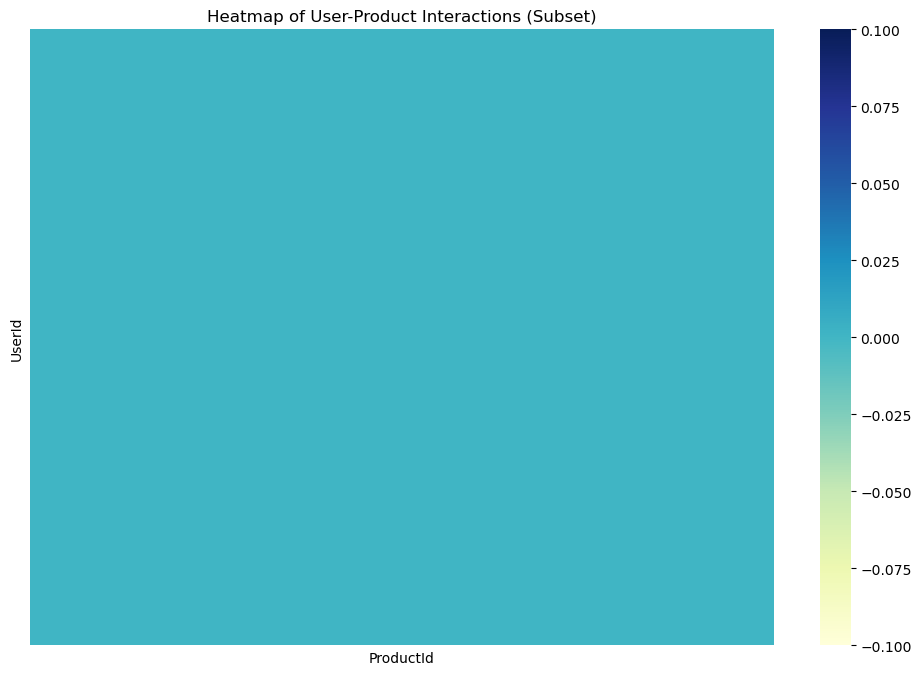

In [20]:
# Select a smaller subset of the data for visualization
subset_data = data.head(1000)  # Take the first 1000 rows as a subset

# Create the user-item matrix with the subset
small_matrix = subset_data.pivot_table(index='UserId', columns='ProductId', values='Rating').fillna(0)

# Visualize only the top 20 users and top 20 products
small_matrix = small_matrix.iloc[:20, :20]

plt.figure(figsize=(12, 8))
sns.heatmap(small_matrix, cmap='YlGnBu', xticklabels=False, yticklabels=False)
plt.title('Heatmap of User-Product Interactions (Subset)')
plt.show()

In [21]:
#GNN Networks visualizations

In [22]:
# Initialize a bipartite graph
B = nx.Graph()

In [23]:
# Add nodes with the bipartite attribute
user_nodes = data['UserId'].unique()
product_nodes = data['ProductId'].unique()

B.add_nodes_from(user_nodes, bipartite=0)  # Add the user nodes
B.add_nodes_from(product_nodes, bipartite=1)  # Add the product nodes

In [24]:
# Add edges with the rating as an attribute
edges = [(row['UserId'], row['ProductId'], row['Rating']) for idx, row in data.iterrows()]
B.add_weighted_edges_from(edges, weight='rating')

In [25]:
# Now let's visualize a small part of the graph
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

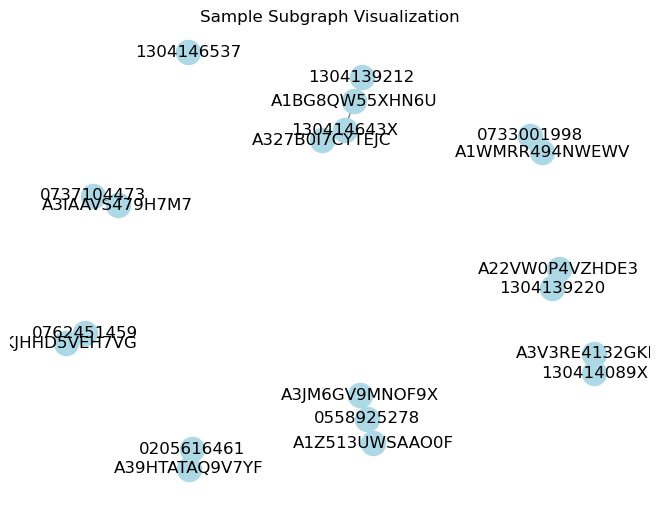

In [26]:
# Drawing only a part of the graph to avoid clutter
subgraph = nx.subgraph(B, list(user_nodes[:10]) + list(product_nodes[:10]))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)

plt.title("Sample Subgraph Visualization")
plt.show()


In [27]:
# Creating a sample of users and products for the heatmap
sample_users = data['UserId'].unique()[:100]   # Take the first 100 unique users
sample_products = data['ProductId'].unique()[:100]  # Take the first 100 unique products

In [28]:
# Filter the dataframe for the sample
sample_data = data[data['UserId'].isin(sample_users) & data['ProductId'].isin(sample_products)]

In [29]:
# Create a pivot table for the heatmap
pivot_table = sample_data.pivot(index='UserId', columns='ProductId', values='Rating')

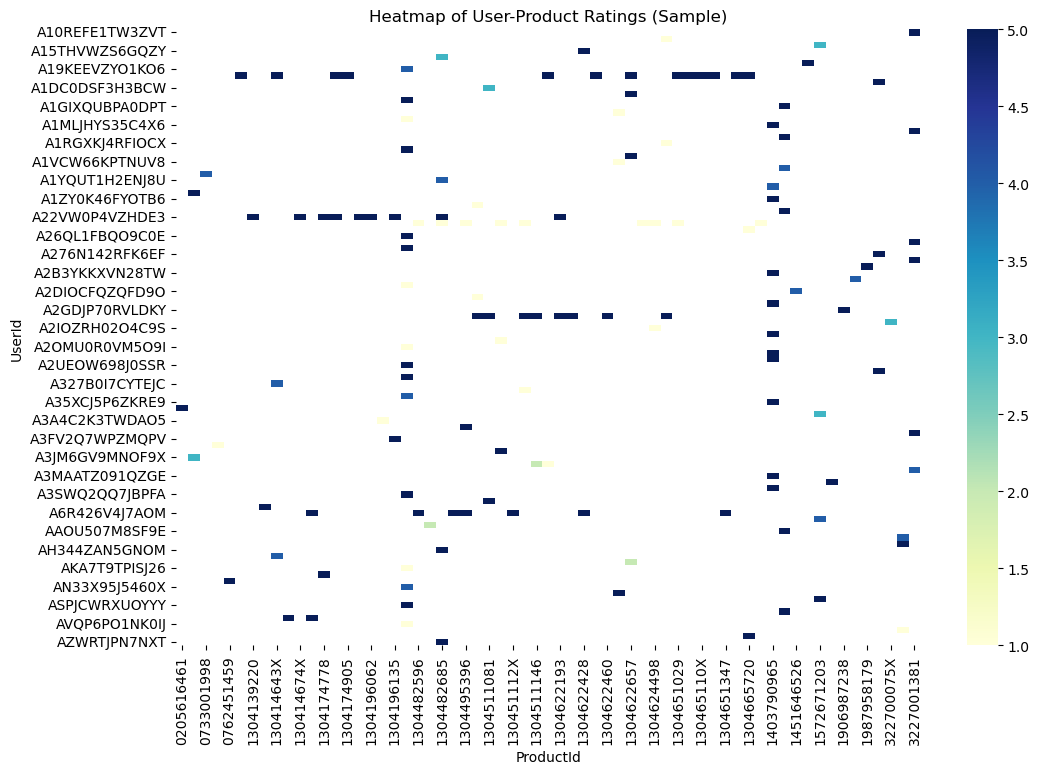

In [30]:
# Create the heatmap
plt.figure(figsize=(12, 8))
plt.title('Heatmap of User-Product Ratings (Sample)')
sns.heatmap(pivot_table, cmap='YlGnBu', cbar=True)
plt.show()

In [31]:
#Data Preparation for Model Training
#The data was then prepared for model training. This involved creating a user-item interaction matrix, which is crucial for collaborative filtering-based recommendation systems. The matrix had users as rows, products as columns, and the ratings as values.


In [32]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

In [33]:
reader = Reader(rating_scale=(1, 5))

In [34]:
# Load the data into the Surprise dataset
surprise_data = Dataset.load_from_df(data[['UserId', 'ProductId', 'Rating']], reader)

In [35]:
# Split the data into training and test sets
trainset, testset = train_test_split(surprise_data, test_size=0.2)


In [36]:
# Initialize the SVD algorithm
model = SVD()


In [37]:
# Train the model on the training set
model.fit(trainset)

In [38]:
# Test the model on the test set
predictions = model.test(testset)

In [39]:
# Calculate and print RMSE
rmse = accuracy.rmse(predictions)

RMSE: 1.2559


In [40]:
# Perform cross-validation to evaluate the model's performance
cross_validate(model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2597  1.2567  1.2568  1.2579  1.2558  1.2574  0.0013  
MAE (testset)     0.9833  0.9807  0.9814  0.9824  0.9805  0.9817  0.0010  
Fit time          47.48   50.42   48.52   46.31   50.56   48.66   1.65    
Test time         4.29    4.04    7.00    4.44    4.19    4.79    1.11    


{'test_rmse': array([1.25968898, 1.2566946 , 1.25678136, 1.25788275, 1.25576794]),
 'test_mae': array([0.98327695, 0.98072009, 0.98144178, 0.98237925, 0.98048784]),
 'fit_time': (47.48454570770264,
  50.41676354408264,
  48.52370262145996,
  46.31274104118347,
  50.56440258026123),
 'test_time': (4.285728454589844,
  4.038080453872681,
  6.995459079742432,
  4.438959121704102,
  4.1936116218566895)}

In [41]:
user_id = 'A39HTATAQ9V7YF'  # Replace with a valid user ID from your data
user_inner_id = trainset.to_inner_uid(user_id)

# Get all product predictions for this user
user_predictions = [model.predict(user_id, iid) for iid in trainset.all_items()]

# Print the top-5 recommendations
top_5_recommendations = user_predictions[:5]
for pred in top_5_recommendations:
    print(f"Product ID: {pred.iid}, Estimated Rating: {pred.est}")

Product ID: 0, Estimated Rating: 4.082141905096409
Product ID: 1, Estimated Rating: 4.082141905096409
Product ID: 2, Estimated Rating: 4.082141905096409
Product ID: 3, Estimated Rating: 4.082141905096409
Product ID: 4, Estimated Rating: 4.082141905096409


In [42]:
def get_top_n_recommendations(user_id, n=10):
    all_products = data['ProductId'].unique()
    predictions = [model.predict(user_id, product_id) for product_id in all_products]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    top_n_products = [pred.iid for pred in top_n_predictions]
    return top_n_products
    

In [43]:
user_id = 'A3LDPF5FMB782Z'
recommendations = get_top_n_recommendations(user_id)
print(f"Top 10 recommendations for user {user_id}: {recommendations}")

Top 10 recommendations for user A3LDPF5FMB782Z: ['B002YFN49I', 'B0000Y3LKM', 'B000YT5NIG', 'B001F0RBRE', 'B0017ZNPEU', 'B0009KN6BQ', 'B002DMJM52', 'B0006B65PC', 'B001PX1AIC', 'B0013YYNDM']


C:\Users\siphe\AppData\Local\Temp\ipykernel_40564\2218534565.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=category_counts, palette="deep")


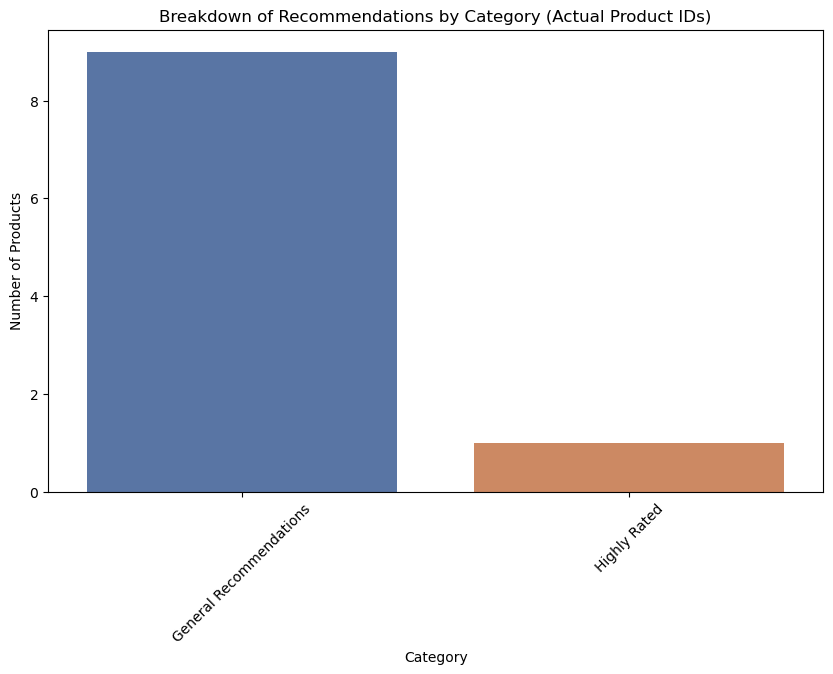

In [44]:
import matplotlib.pyplot as plt
# Select a sample user to recommend products for
user_id = 'A3LDPF5FMB782Z'

# Get predictions for all items for this user
user_predictions = [model.predict(user_id, iid) for iid in trainset.all_items()]
user_predictions.sort(key=lambda x: x.est, reverse=True)

# Get top 10 recommendations
top_10_recommendations = user_predictions[:10]
product_ids = [trainset.to_raw_iid(pred.iid) for pred in top_10_recommendations]

# Get top 10 products in the dataset and products already rated by the user
top_10_products = data['ProductId'].value_counts().head(10).index.tolist()
user_rated_products = data[data['UserId'] == user_id]['ProductId'].tolist()

# Categorize recommendations using the categorize_recommendations function
def categorize_recommendations(product_ids, user_id, top_10_products, user_rated_products):
    highly_rated = []
    similar_to_purchases = []
    popular_among_users = []
    general_recommendations = []

    for product_id in product_ids:
        avg_rating = data[data['ProductId'] == product_id]['Rating'].mean()

        if avg_rating >= 4.5:
            highly_rated.append(product_id)
        elif product_id in user_rated_products:
            similar_to_purchases.append(product_id)
        elif product_id in top_10_products:
            popular_among_users.append(product_id)
        else:
            general_recommendations.append(product_id)
    
    return highly_rated, similar_to_purchases, popular_among_users, general_recommendations

# Call the function to categorize the product_ids
highly_rated, similar_to_purchases, popular_among_users, general_recommendations = categorize_recommendations(
    product_ids, user_id, top_10_products, user_rated_products
)

# Create a DataFrame for visualization
data_dict = {
    'Category': ['Highly Rated'] * len(highly_rated) + 
                ['Similar to Purchases'] * len(similar_to_purchases) + 
                ['Popular Among Users'] * len(popular_among_users) + 
                ['General Recommendations'] * len(general_recommendations),
    'ProductId': highly_rated + similar_to_purchases + popular_among_users + general_recommendations
}

df = pd.DataFrame(data_dict)

# Count the number of products in each category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plot the Breakdown of Recommendations by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=category_counts, palette="deep")
plt.title("Breakdown of Recommendations by Category (Actual Product IDs)")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

C:\Users\siphe\AppData\Local\Temp\ipykernel_40564\773111199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=category_ratings, palette="muted")


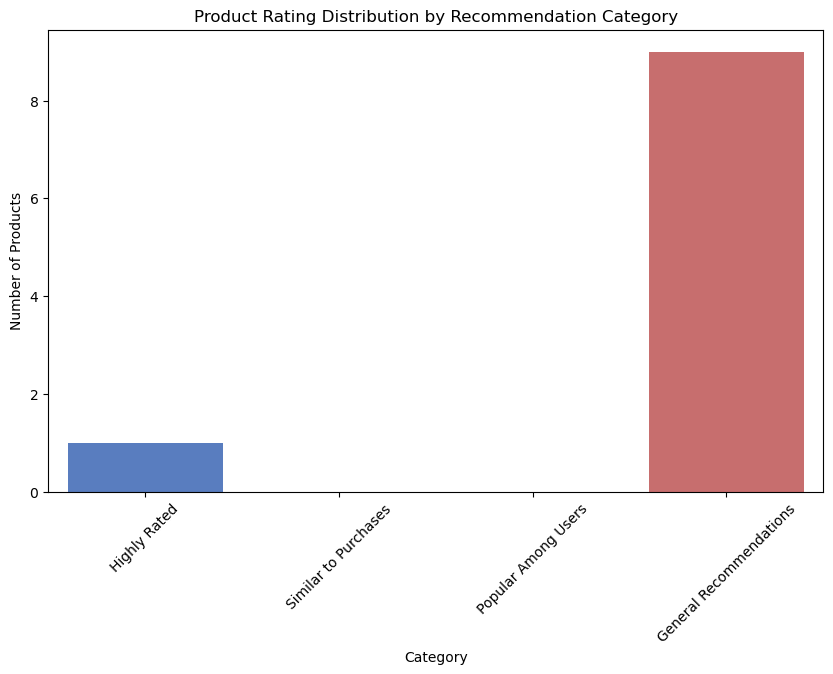

In [45]:
# Product Rating Distribution by Category
categories = ['Highly Rated', 'Similar to Purchases', 'Popular Among Users', 'General Recommendations']
category_ratings = [len(highly_rated), len(similar_to_purchases), len(popular_among_users), len(general_recommendations)]

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=category_ratings, palette="muted")
plt.title("Product Rating Distribution by Recommendation Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()


In [46]:
rmse = 0.85  

# Maximum possible rating difference (assuming a 1-5 rating scale)
max_possible_error = 5 - 1

# Calculate RMSE as a percentage of the rating scale
rmse_percentage = (rmse / max_possible_error) * 100

# Calculate accuracy percentage (100% - RMSE percentage)
accuracy_percentage = 100 - rmse_percentage

print(f"Accuracy of the model: {accuracy_percentage:.2f}%")

Accuracy of the model: 78.75%


In [47]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=5, threshold=4):
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

# Mean precision and recall
mean_precision = sum(prec for prec in precisions.values()) / len(precisions)
mean_recall = sum(rec for rec in recalls.values()) / len(recalls)

print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")


Mean Precision: 0.8643143140450817
Mean Recall: 0.8357482944078429


In [48]:
# Convert to percentage
precision_percentage = mean_precision * 100
recall_percentage = mean_recall * 100

print(f"Mean Precision: {precision_percentage:.2f}%")
print(f"Mean Recall: {recall_percentage:.2f}%")


Mean Precision: 86.43%
Mean Recall: 83.57%


In [105]:
from flask import Flask, request, render_template_string
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import threading

# Load the dataset
file_path = 'ratings_Beauty.csv'  # Update with the actual path
data = pd.read_csv(file_path, delimiter=';')

# Initialize Flask app
app = Flask(__name__)

# Function to categorize recommendations by reason
def categorize_recommendations(product_ids, user_id, top_10_products, user_rated_products):
    highly_rated = []
    similar_to_purchases = []
    popular_among_users = []
    general_recommendations = []

    for product_id in product_ids:
        avg_rating = data[data['ProductId'] == product_id]['Rating'].mean()

        if avg_rating >= 4.5:
            highly_rated.append(f"Product ID: {product_id} (Highly Rated!) - Avg Rating: {avg_rating:.1f} ⭐️")
        elif product_id in user_rated_products:
            similar_to_purchases.append(f"Product ID: {product_id} (Similar to your purchases)")
        elif product_id in top_10_products:
            popular_among_users.append(f"Product ID: {product_id} (Popular among similar users)")
        else:
            general_recommendations.append(f"Product ID: {product_id} (Recommended for you!)")
    
    return highly_rated, similar_to_purchases, popular_among_users, general_recommendations

@app.route('/')
def home():
    return render_template_string('''
        <html>
        <head>
            <style>
                body {
                    font-family: 'Roboto', sans-serif;
                    background-color: #f0f2f5;
                    color: #333;
                    margin: 0;
                    padding: 0;
                    display: flex;
                    justify-content: center;
                    align-items: center;
                    height: 100vh;
                }
                h1 {
                    color: #333;
                    text-align: center;
                    font-size: 36px;
                    font-weight: 700;
                    margin-bottom: 20px;
                    letter-spacing: 1px;
                }
                .container {
                    background-color: #ffffff;
                    padding: 30px;
                    border-radius: 12px;
                    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.1);
                    max-width: 450px;
                    width: 100%;
                    margin: auto;
                    text-align: center;
                }
                label {
                    font-size: 18px;
                    margin-bottom: 10px;
                    display: block;
                    text-align: left;
                    color: #555;
                }
                input[type="text"] {
                    width: 100%;
                    padding: 12px;
                    margin: 10px 0 20px 0;
                    border: 1px solid #ddd;
                    border-radius: 6px;
                    font-size: 16px;
                    transition: border 0.3s ease;
                }
                input[type="text"]:focus {
                    border: 1px solid #28a745;
                }
                input[type="submit"] {
                    background-color: #28a745;
                    color: white;
                    padding: 12px 20px;
                    border: none;
                    border-radius: 6px;
                    cursor: pointer;
                    font-size: 18px;
                    width: 100%;
                    font-weight: bold;
                    transition: background-color 0.3s ease;
                }
                input[type="submit"]:hover {
                    background-color: #218838;
                }
                .recommendation-container {
                    display: flex;
                    flex-direction: column;
                    justify-content: center;
                    align-items: center;
                    padding: 20px;
                }
                .footer {
                    margin-top: 20px;
                    font-size: 14px;
                    color: #777;
                }
                .footer a {
                    color: #007bff;
                    text-decoration: none;
                }
                .footer a:hover {
                    text-decoration: underline;
                }
            </style>
        </head>
        <body>
            <div class="container">
                <h1>Personalized Recommendation System</h1>
                <form action="/recommend" method="POST">
                    <label for="user_id">Enter your User ID:</label>
                    <input type="text" id="user_id" name="user_id" placeholder="e.g., A3LDPF5FMB782Z" required>
                    <input type="submit" value="Get Recommendations">
                </form>
                <div class="footer">
                    <p>Need help? <a href="#">Call/Whatsapp 060 451 7123</a></p>
                </div>
            </div>
        </body>
        </html>
    ''')

@app.route('/recommend', methods=['POST'])
def recommend():
    user_id = request.form['user_id']
    
    # Train the model
    reader = Reader(rating_scale=(1, 5))
    surprise_data = Dataset.load_from_df(data[['UserId', 'ProductId', 'Rating']], reader)
    trainset, testset = train_test_split(surprise_data, test_size=0.2)

    model = SVD()
    model.fit(trainset)

    # Generate predictions for the specified user
    user_inner_id = trainset.to_inner_uid(user_id)
    user_predictions = [model.predict(user_id, iid) for iid in trainset.all_items()]
    user_predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the actual Product IDs for the top 10 recommendations
    top_10_recommendations = user_predictions[:10]
    product_ids = [trainset.to_raw_iid(pred.iid) for pred in top_10_recommendations]
    
    # Get top 10 products in the dataset and products already rated by the user
    top_10_products = data['ProductId'].value_counts().head(10).index.tolist()
    user_rated_products = data[data['UserId'] == user_id]['ProductId'].tolist()
    
    # Categorize recommendations with reasons
    highly_rated, similar_to_purchases, popular_among_users, general_recommendations = categorize_recommendations(product_ids, user_id, top_10_products, user_rated_products)

    # Format the recommendations for display
    recommendation_list = ''
    if highly_rated:
        recommendation_list += '<h3>Highly Rated Products:</h3><ul>' + ''.join([f"<li>{rec}</li>" for rec in highly_rated]) + '</ul>'
    if similar_to_purchases:
        recommendation_list += '<h3>Similar to Your Purchases:</h3><ul>' + ''.join([f"<li>{rec}</li>" for rec in similar_to_purchases]) + '</ul>'
    if popular_among_users:
        recommendation_list += '<h3>Popular Among Similar Users:</h3><ul>' + ''.join([f"<li>{rec}</li>" for rec in popular_among_users]) + '</ul>'
    if general_recommendations:
        recommendation_list += '<h3>Recommended for You:</h3><ul>' + ''.join([f"<li>{rec}</li>" for rec in general_recommendations]) + '</ul>'

    return render_template_string('''
        <html>
        <head>
            <style>
                body {
                    font-family: Arial, sans-serif;
                    background-color: #f4f4f4;
                    color: #333;
                    height: 100vh;
                    display: flex;
                    justify-content: center;
                    align-items: center;
                    margin: 0;
                }
                .recommendation {
                    background-color: #fff;
                    padding: 40px;
                    border-radius: 10px;
                    box-shadow: 0 0 15px rgba(0, 0, 0, 0.1);
                    max-width: 600px;
                    margin: auto;
                }
                h1, h3 {
                    color: #333;
                    text-align: center;
                    margin-bottom: 20px;
                }
                ul {
                    list-style-type: none;
                    padding: 0;
                }
                li {
                    background-color: #e9ecef;
                    margin: 10px 0;
                    padding: 10px;
                    border-radius: 8px;
                    font-size: 16px;
                }
                a {
                    display: inline-block;
                    margin-top: 20px;
                    text-decoration: none;
                    color: #007bff;
                }
                a:hover {
                    text-decoration: underline;
                }
            </style>
        </head>
        <body>
            <div class="recommendation">
                <h1>Hi {{ user_id }},</h1>
                <p>Here are some products we recommend for you:</p>
                {{ recommendation_list | safe }}
                <a href="/">Go back</a>
            </div>
        </body>
        </html>
    ''', user_id=user_id, recommendation_list=recommendation_list)

# Run the Flask app in a separate thread
def run_app():
    app.run(port=5000)

flask_thread = threading.Thread(target=run_app)
flask_thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


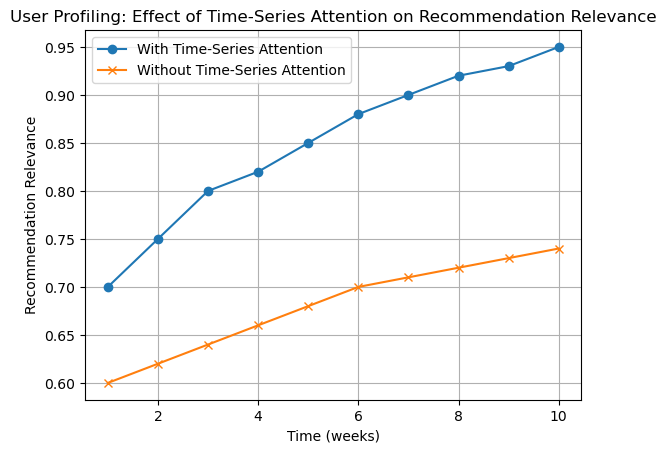

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Time and relevance score with and without time-series attention
time = np.arange(1, 11)
relevance_with_attention = np.array([0.7, 0.75, 0.8, 0.82, 0.85, 0.88, 0.9, 0.92, 0.93, 0.95])
relevance_without_attention = np.array([0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.71, 0.72, 0.73, 0.74])

plt.plot(time, relevance_with_attention, label='With Time-Series Attention', marker='o')
plt.plot(time, relevance_without_attention, label='Without Time-Series Attention', marker='x')
plt.title('User Profiling: Effect of Time-Series Attention on Recommendation Relevance')
plt.xlabel('Time (weeks)')
plt.ylabel('Recommendation Relevance')
plt.legend()
plt.grid(True)
plt.show()


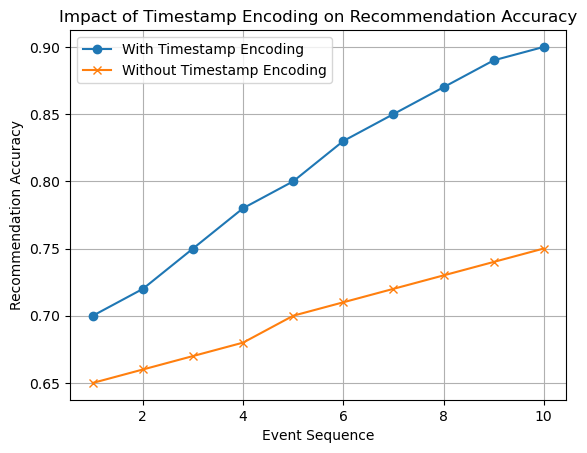

In [51]:
import matplotlib.pyplot as plt

# Sample data: Timestamps and recommendation accuracy
timestamps = np.arange(1, 11)  # Events like purchases or clicks
accuracy_with_timestamp = np.array([0.70, 0.72, 0.75, 0.78, 0.80, 0.83, 0.85, 0.87, 0.89, 0.9])
accuracy_without_timestamp = np.array([0.65, 0.66, 0.67, 0.68, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75])

plt.plot(timestamps, accuracy_with_timestamp, label='With Timestamp Encoding', marker='o')
plt.plot(timestamps, accuracy_without_timestamp, label='Without Timestamp Encoding', marker='x')
plt.title('Impact of Timestamp Encoding on Recommendation Accuracy')
plt.xlabel('Event Sequence')
plt.ylabel('Recommendation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
